# Setup

In [1]:
!git clone https://github.com/PeizeSun/OneNet.git

Cloning into 'OneNet'...
remote: Enumerating objects: 602, done.
remote: Counting objects: 100% (602/602), done.
remote: Compressing objects: 100% (499/499), done.
remote: Total 602 (delta 135), reused 523 (delta 93), pack-reused 0
Receiving objects: 100% (602/602), 1.50 MiB | 6.83 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [2]:
cd OneNet

/content/OneNet


In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [4]:
pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████▌                | 357.4MB 1.5MB/s eta 0:04:08
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 153, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 382, in run
    resolver.resolve(requirement_set)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/legacy_resolve.py", line 201, in resolve
    self._resolve_one(requirement_set, req)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/legacy_resolve.py", line 365, in _resolve_one
    abstract_dist = self._get_abstract_dist_for(req_to_install)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/legacy_resolve.py", line 313, in _get_abstract_dist_for
    req, self.session, self.finder, self.require_hashes
  File "/usr/local/lib/python3.7/dist-packa

In [ ]:
!python setup.py build develop

running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/detectron2
copying detectron2/__init__.py -> build/lib.linux-x86_64-3.7/detectron2
creating build/lib.linux-x86_64-3.7/detectron2/engine
copying detectron2/engine/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/engine
copying detectron2/engine/train_loop.py -> build/lib.linux-x86_64-3.7/detectron2/engine
copying detectron2/engine/defaults.py -> build/lib.linux-x86_64-3.7/detectron2/engine
copying detectron2/engine/hooks.py -> build/lib.linux-x86_64-3.7/detectron2/engine
copying detectron2/engine/launch.py -> build/lib.linux-x86_64-3.7/detectron2/engine
creating build/lib.linux-x86_64-3.7/detectron2/solver
copying detectron2/solver/lr_scheduler.py -> build/lib.linux-x86_64-3.7/detectron2/solver
copying detectron2/solver/build.py -> build/lib.linux-x86_64-3.7/detectron2/solver
copying detectron2/solver/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/solver
creat

# Setup dataset and more

we need to download the file "onenet_r18dcn.pth" from https://drive.google.com/drive/folders/1LnHMj7pkJhODeZTNHW-UcUZxybKbQmTB
and place it in the path "/content/OneNet/configs/"

In [ ]:
!pip install pyyaml==5.1 pycocotools>=2.0.1

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.1+cu101 True


In [ ]:
!mkdir -p datasets/coco
!ln -s /path_to_coco_dataset/annotations datasets/coco/annotations
!ln -s /path_to_coco_dataset/train2017 datasets/coco/train2017
!ln -s /path_to_coco_dataset/val2017 datasets/coco/val2017

In [ ]:
!wget http://images.cocodataset.org/zips/test2017.zip
!unzip test2017

Streaming output truncated to the last 5000 lines.
 extracting: test2017/000000251604.jpg  
 extracting: test2017/000000145034.jpg  
 extracting: test2017/000000234833.jpg  
 extracting: test2017/000000025927.jpg  
 extracting: test2017/000000393116.jpg  
 extracting: test2017/000000536478.jpg  
 extracting: test2017/000000365460.jpg  
 extracting: test2017/000000089887.jpg  
 extracting: test2017/000000274928.jpg  
 extracting: test2017/000000310028.jpg  
 extracting: test2017/000000229793.jpg  
 extracting: test2017/000000394339.jpg  
 extracting: test2017/000000564538.jpg  
 extracting: test2017/000000440585.jpg  
 extracting: test2017/000000541512.jpg  
 extracting: test2017/000000395525.jpg  
 extracting: test2017/000000235435.jpg  
 extracting: test2017/000000069964.jpg  
 extracting: test2017/000000131962.jpg  
 extracting: test2017/000000281392.jpg  
 extracting: test2017/000000534893.jpg  
 extracting: test2017/000000128676.jpg  
 extracting: test2017/000000187639.jpg  
 extra

# Evaluate

In [15]:
!python projects/OneNet/train_net.py --num-gpus 1 \
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --eval-only MODEL.WEIGHTS /content/OneNet/configs/onenet_r18dcn.pth

Command Line Args: Namespace(config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=True, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', '/content/OneNet/configs/onenet_r18dcn.pth'], resume=False)
[06/02 19:39:47 detectron2]: Rank of current process: 0. World size: 1
[06/02 19:39:47 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.10 (default, May  3 2021, 02:48:31) [GCC 7.5.0]
numpy                   1.19.5
detectron2              0.3 @/content/OneNet/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.0
detectron2 arch flags   7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1+cu101 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla T4 (arch=7.5)
CUDA_HOME            

# Visualize
make sure you select image at input

In [20]:
!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input /content/OneNet/test2017/000000286989.jpg --output /content/OneNet/output_image --confidence-threshold 0.4 \
    --opts MODEL.WEIGHTS /content/OneNet/configs/onenet_r18dcn.pth

[06/02 19:45:37 detectron2]: Arguments: Namespace(confidence_threshold=0.4, config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', input=['/content/OneNet/test2017/000000286989.jpg'], opts=['MODEL.WEIGHTS', '/content/OneNet/configs/onenet_r18dcn.pth'], output='/content/OneNet/output_image', video_input=None, webcam=False)
[06/02 19:45:41 fvcore.common.checkpoint]: [Checkpointer] Loading from /content/OneNet/configs/onenet_r18dcn.pth ...
  0% 0/1 [00:00<?, ?it/s][06/02 19:45:41 detectron2]: /content/OneNet/test2017/000000286989.jpg: detected 1 instances in 0.08s
100% 1/1 [00:00<00:00,  5.25it/s]


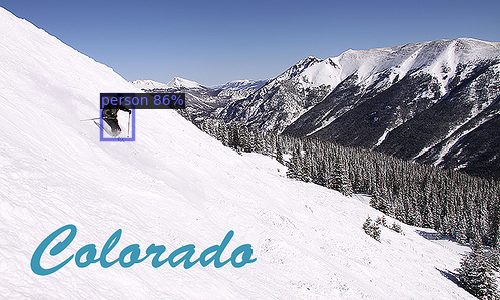

In [21]:
from IPython.display import Image
Image('/content/OneNet/output_image.png')